In [1]:
import sys
import os
directory = os.path.abspath(os.path.dirname(os.getcwd()))
print(directory)
sys.path.append(directory)

from src.photometry_data import PhotometryData
from src.wrapped_fits import WrappedFits
from src.utility import fits_file_utils as f_utils

/mnt/c/Users/nicho/Research/GitHub/erebus


In [2]:
folder = "/home/nicho/venus/Research/TRAPPIST-1B/JWST"
visits = f_utils.get_fits_files_visits_in_folder(folder)
fits = WrappedFits(folder, visits[0], star_pixel_position = (697, 515))
photometry = PhotometryData(fits, 5, (12,20))

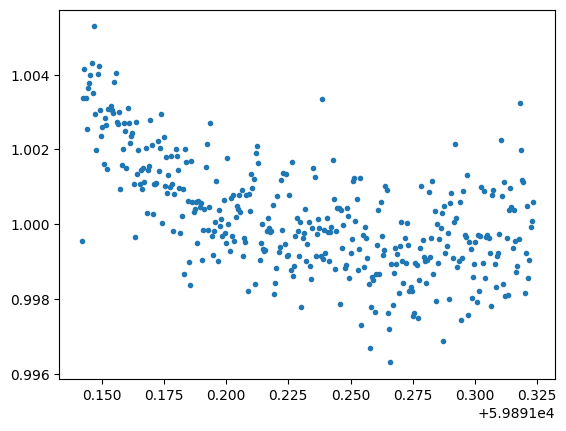

In [3]:
import matplotlib.pyplot as plt
plt.plot(photometry.t, photometry.light_curve, linestyle='', marker='.')

### Test fitting

In [4]:
import batman
import matplotlib.pyplot as plt
import numpy as np
from src.mcmc_model import WrappedMCMC
from src.utility.bayesian_parameter import Parameter

In [16]:
def physical_model(x, t_sec, fp, rp_rstar, a_rstar, b, per):	
	# Convert impact to inclination
	inc = np.rad2deg(np.arccos(b / a_rstar))
	
	params = batman.TransitParams()
	params.t0 = t_sec - per / 2
	params.t_secondary = t_sec
	params.fp = fp
	params.rp = rp_rstar
	params.inc = inc
	params.per = per
	params.a = a_rstar  
	params.ecc = 0.0  # Fixed: circular orbit
	params.w = 90.0  # Fixed: circular orbit
	params.limb_dark = "quadratic"
	params.u = [0.3, 0.3]
	transit_model = batman.TransitModel(params, x, transittype="secondary")
	flux_model = transit_model.light_curve(params)
	return flux_model

In [17]:
time = photometry.t - np.min(photometry.t)
flux = photometry.light_curve

mcmc = WrappedMCMC()
mcmc.add_parameter("t_sec", Parameter.uniform_prior(np.mean(time), np.min(time), np.max(time)))
mcmc.add_parameter("fp", Parameter.uniform_prior(0, -2000, 2000))
mcmc.add_parameter("rp_rstar", Parameter.uniform_prior(1e-2, 1e-4, 1e-1))
mcmc.add_parameter("a_rstar", Parameter.uniform_prior(20, 5, 40))
mcmc.add_parameter("b", Parameter.uniform_prior(0.1, 0, 1))
mcmc.add_parameter("per", Parameter.uniform_prior(3, 2, 10))
mcmc.add_parameter("y_err", Parameter.uniform_prior(300, 10, 1000))
mcmc.set_method(physical_model)

res, sampler, _, _ = mcmc.run(time, flux)

Initial guesses: [0.09057634808618727, 0.0, 0.01, 20.0, 0.1, 3.0, 300.0] variation: [0.022644087020523933, 500.0, 0.002475, 3.75, 0.025, 0.25, 72.5]
Initial likelihood: -2496.765819968543
Fitting for 7 parameters
Moved away from starting positions
Initial guesses shape: (2, 64, 7)
Mean likelihood after moving: -1215.8842781732635
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:36<00:00, 272.65it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 253.73it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [419.19109865 348.53843841 402.38641631 497.96452134 424.92730751
 415.95455485 412.7582576 ]
Rubin gelman convergence: [1.00043425 1.00092455 1.00236662 1.00272419 1.00016584 1.00043367
 1.00050477] converged? True
Autocorr time: inf converged? False
Iterations: 10000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:38<00:00, 256.72it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 255.33it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 7 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 400;
tau: [642.47212093 445.62469871 428.76979012 874.45078146 523.62916666
 597.56464494 465.58198867]
Rubin gelman convergence: [1.0007952  0.99999929 1.00028565 1.00085708 1.0007335  1.0008267
 1.00048915] converged? True
Autocorr time: inf converged? False
Iterations: 20000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 255.67it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:38<00:00, 257.59it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 600;
tau: [ 692.67362406  423.14119887  425.97696934 1105.74775349  587.05156323
  637.95244521  496.79822653]
Rubin gelman convergence: [1.00099934 1.00004829 1.00005097 1.00009827 1.00060386 1.0000571
 1.00000858] converged? True
Autocorr time: inf converged? False
Iterations: 30000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 254.75it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 253.05it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 800;
tau: [ 660.9606957   416.58034313  416.6247445  1330.09458846  566.35395426
  669.55590539  498.90589762]
Rubin gelman convergence: [1.00016577 1.0000176  1.00004838 1.000053   1.00045043 1.00007036
 1.00006311] converged? True
Autocorr time: inf converged? False
Iterations: 40000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 254.57it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:40<00:00, 248.60it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1000;
tau: [ 626.99059696  424.68936196  424.58527957 1408.08537277  573.13191281
  679.10535727  494.6851109 ]
Rubin gelman convergence: [1.00051569 0.99999975 0.99999972 1.00006153 1.00063688 1.00020885
 1.00002842] converged? True
Autocorr time: inf converged? False
Iterations: 50000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 255.29it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 253.29it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1200;
tau: [ 634.887304    431.51453224  451.73526782 1491.59963764  556.61825662
  692.70693144  491.5470868 ]
Rubin gelman convergence: [1.00031386 1.00004929 1.00000212 1.00087483 1.00076369 1.00040014
 1.00001651] converged? True
Autocorr time: inf converged? False
Iterations: 60000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 252.16it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 252.88it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1400;
tau: [ 631.3546085   412.88519801  465.86479683 1645.58186034  583.930323
  702.28283071  484.88199915]
Rubin gelman convergence: [1.00012048 1.00001078 1.00002519 1.00093672 1.00078224 1.00024779
 1.00006873] converged? True
Autocorr time: inf converged? False
Iterations: 70000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 255.36it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 255.05it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1600;
tau: [ 612.11558528  417.71104466  474.0024286  1719.97591216  574.96193826
  728.48753296  483.70760316]
Rubin gelman convergence: [1.00003364 1.00000043 1.00011087 1.00072882 1.00062567 0.99999988
 1.00015686] converged? True
Autocorr time: inf converged? False
Iterations: 80000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:40<00:00, 249.80it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 251.81it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 1 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 1800;
tau: [ 601.09127688  425.40924111  474.26745067 1822.94668311  566.7403615
  738.36943098  481.68036914]
Rubin gelman convergence: [1.00001931 1.0000196  1.00014898 1.00102072 1.00044351 1.00001295
 1.0000446 ] converged? True
Autocorr time: inf converged? False
Iterations: 90000 Max steps: 100000
Continue looping? True
process chain 0


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:38<00:00, 259.37it/s]


process chain 1


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:39<00:00, 252.60it/s]


Rubin gelman convergence: [1.00007588 1.00000228 1.00016652 1.00184411 1.000267   0.99999993
 1.0000219 ] converged? True
Autocorr time: 735.3655152326579 converged? True
Iterations: 100000 Max steps: 100000
Continue looping? False
Autocorr time: 735.3655152326579


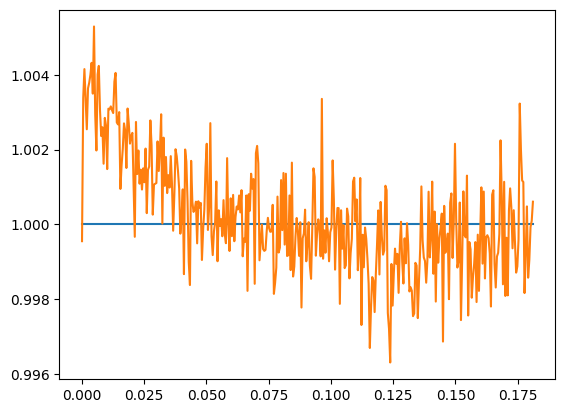

In [29]:
params = np.array(res)[:-1,0]
model_flux = physical_model(time, *params)
plt.plot(time, model_flux)
plt.plot(time, flux)

In [30]:
print(params)

[ 0.0914436  -0.08647393  0.04569242  6.8761726   0.29248914  8.34083752]
